## Plotting the figure 1.

The required csv files to plot the figure 1 are saved at  https://github.com/Geemjy/Geem_etal_MNRAS_2022/tree/main/data.

### Import packages and define the function

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import os

D2R = 3.14/180
def d2r(x): return np.deg2rad(x)
def r2d(x): return np.rad2deg(x)
def sin(x): return np.sin(x)
def cos(x): return np.cos(x)
def tan(x): return np.tan(x)
def log(x): return np.log(x)
def log10(x): return np.log10(x)
def exp(x):
    return np.exp(x)
def ln(x):
    return np.log(x)

def exponential(x,a,b,c):
    eq = a*np.exp(-x/b) -a + c*x
    return eq 

def trigonal_function(alpha,h,a0,c1,c2):
    alpha_rad = d2r(alpha)
    a0_rad = d2r(a0)
    D2R = 3.14/180
    P_alpha = (h / D2R 
             * (sin(alpha_rad) / sin(a0_rad))**c1 
             * (cos(alpha_rad / 2) / cos(a0_rad/ 2))**c2 
             * sin(alpha_rad - a0_rad)
            )
    return P_alpha

### Plot

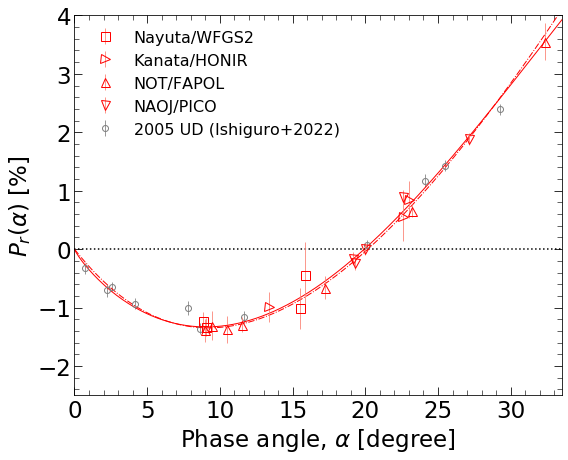

In [7]:
filename = os.path.join('Phaethon_data.csv')
result = pd.read_csv(filename)

UD = pd.DataFrame({'alpha':[68.08,63.6,55.44,33.49,29.28,25.47,11.67,8.66,106.47,87.74,44.01,39.53,35.71,24.08,20.15,2.58,0.74,2.25,4.18,7.83],
                  'Pr':[22.73,19.33,14.09,4.22,2.39,1.43,-1.16,-1.36,51.31,43.16,8.65,6.47,4.95,1.17,0.08,-0.64,-0.33,-0.7,-0.93,-1],
                  'eP':[3.59,0.84,1.29,0.22,0.1,0.09,0.1,0.09,3.62,0.59,0.14,0.13,0.1,0.11,0.07,0.08,0.09,0.11,0.09,0.12]})



fig, ax = plt.subplots(1, 1, figsize=(8, 6.5))

color=['k','k','k','k']
marker=['s','>','^','v','o']


for n,inst in enumerate(['Nayuta/WFGS2','Kanata/HONIR','NOT/FAPOL','NAOJ/PICO']):
    result_inst = result[result['INST']==inst]
    ax.errorbar(result_inst['alpha'],
                result_inst['P'],
                yerr = result_inst['eP'],
                marker=marker[n],mfc='none',mec='r',ls='',ms=9,#marker
                ecolor='salmon',elinewidth=0.8, #error
                label=inst,zorder=10)
    

xx = np.arange(0,40,0.1)
model_P_ver2 = trigonal_function(xx,0.224, 19.93, 0.86, 5.384)
ax.plot(xx,model_P_ver2, 'r-',lw=1)
model_P_exp = exponential(xx,16.406,19.515, 0.524)
ax.plot(xx,model_P_exp, color='r',ls='-.',lw=1)



ax.errorbar(UD['alpha'],UD['Pr'],UD['eP'],
              marker='o',ls='',mec='gray',mfc='none',
            ecolor='gray',elinewidth=0.8,label='2005 UD (Ishiguro+2022)')    

    
ax.axhline(0,ls=':',color='k')
majorLocatorx = MultipleLocator(5)
majorLocatory = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
minorLocatory = MultipleLocator(0.2)

x = np.arange(15,30)
ax.set_xlabel(r'Phase angle, $ \alpha$ [degree]', size = 23)
ax.set_ylabel(r"$P_r(\alpha)$ [%]",size = 23)
ax.set_xlim(0, 33.5)
ax.set_ylim(-2.5, 4)                
ax.xaxis.set_major_locator(majorLocatorx)
ax.yaxis.set_major_locator(majorLocatory)
ax.xaxis.set_major_formatter(majorFormatter)            
ax.xaxis.set_minor_locator(minorLocator)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(axis = 'both', which='minor', length=5)
ax.tick_params(axis ='both',which='both', direction='in')
ax.tick_params(axis ='both',which='major', length=8)
ax.tick_params(axis = 'both')
ax.tick_params(axis='both',labelsize=23)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.legend(loc=2,fontsize=16,frameon=False)

plt.tight_layout()
#plt.savefig('/home/judy/Dropbox/Research/Phaethon/fig1.pdf',format='pdf')
plt.show()